In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta

In [137]:
# Portfolio of major tech stocks
tech_stocks = {
    'AAPL' : 'Apple Inc.',
    'MSFT' : 'Microsoft Corporation',
    'GOOGL' : 'Alphabet Inc.',
    'AMZN' : 'Amazon.com Inc.',
    'NVDA' : 'NVIDIA Corporation',
    'META' : 'Meta Platforms Inc.',
    'TSLA' : 'TESLA Inc.', 
    'NFLX' : 'Netflix Inc.'
}

# Get the data for all of the stocks
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)

stock_data = {}

for symbol in tech_stocks.keys():
    try:
        data = yf.download(symbol, start=start_date, end=end_date, auto_adjust=True)
        if 'Close' in data:
            stock_data[symbol] = data['Close']
            print(f"Successfully downlaoded data for {symbol} - {tech_stocks[symbol]}")
        else:
            print("No Close data for {symbol}")
    except Exception as e:
        print(f"Error downloading data for {symbol}")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downlaoded data for AAPL - Apple Inc.
Successfully downlaoded data for MSFT - Microsoft Corporation


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downlaoded data for GOOGL - Alphabet Inc.
Successfully downlaoded data for AMZN - Amazon.com Inc.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downlaoded data for NVDA - NVIDIA Corporation
Successfully downlaoded data for META - Meta Platforms Inc.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Successfully downlaoded data for TSLA - TESLA Inc.
Successfully downlaoded data for NFLX - Netflix Inc.


In [16]:
# Combine the data in one dataframe
portfolio_prices = pd.concat(stock_data, axis=1)
portfolio_prices.columns = list(stock_data.keys())
portfolio_prices.head()

,AAPL,MSFT,GOOGL,AMZN,NVDA,META,TSLA,NFLX
Date,,,,,,,,
2023-08-07,177.077042,325.055511,130.745880,142.220001,45.389065,314.832825,251.449997,440.760010
2023-08-08,178.017624,321.057648,130.616623,139.940002,44.636536,310.934204,249.699997,438.299988
2023-08-09,176.423599,317.296143,128.887024,137.850006,42.527828,303.544739,242.190002,428.899994
2023-08-10,176.205780,317.985443,128.916855,138.559998,42.361935,304.071869,245.339996,429.980011
2023-08-11,176.265244,316.094818,128.787613,138.410004,40.829876,299.994232,242.649994,421.660004


In [ ]:
# Exploratory data analysis
portfolio_prices.describe()

,AAPL,MSFT,GOOGL,AMZN,NVDA,META,TSLA,NFLX
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,203.695970,406.508786,160.179186,182.697660,102.569311,508.184172,257.977100,739.018079
std,23.928990,46.028179,20.002549,29.716938,38.041449,128.578016,69.371703,258.594054
min,164.009506,308.011414,121.441666,119.570000,40.304520,281.704529,142.050003,346.190002
25%,182.291061,381.242615,140.641529,161.762493,67.114138,430.106270,208.557503,557.357483
50%,201.982635,411.333511,162.635887,184.470001,112.848053,509.974792,244.129997,675.100006
75%,224.086586,428.842491,174.877613,205.012497,133.548447,597.724442,298.872505,924.492508
max,258.396667,535.640015,205.893341,242.059998,180.000000,776.369995,479.859985,1339.130005


In [19]:
portfolio_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2023-08-07 to 2025-08-04
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    500 non-null    float64
 1   MSFT    500 non-null    float64
 2   GOOGL   500 non-null    float64
 3   AMZN    500 non-null    float64
 4   NVDA    500 non-null    float64
 5   META    500 non-null    float64
 6   TSLA    500 non-null    float64
 7   NFLX    500 non-null    float64
dtypes: float64(8)
memory usage: 35.2 KB


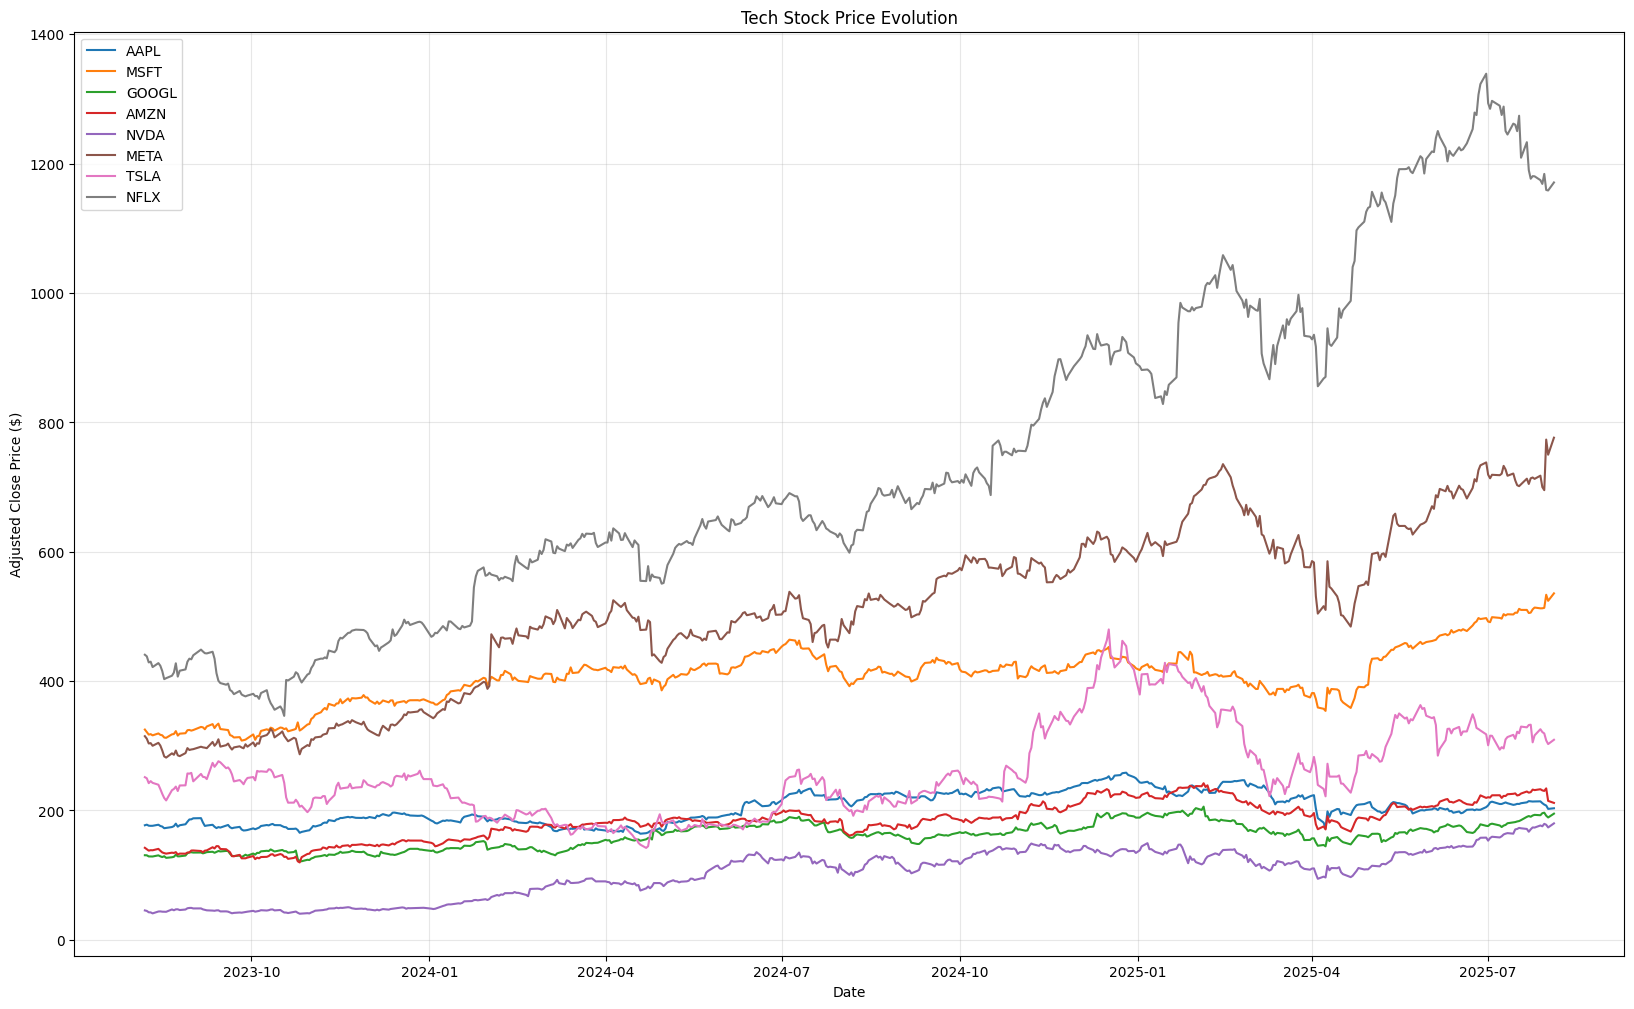

In [35]:
# Basic visualization
plt.figure(figsize=(20,12))
for stock in portfolio_prices.columns:
    plt.plot(portfolio_prices.index, portfolio_prices[stock], label=stock)

plt.title("Tech Stock Price Evolution")
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ($)')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout
plt.show()



In [40]:
# Return and Risk Analyis
# Calculate daily returns
daily_returns = portfolio_prices.pct_change().dropna()

# Calculate key statistics
return_stats_pct = pd.DataFrame({
    'Mean Daily Return ': daily_returns.mean() * 100,
    'Volatility' : daily_returns.std() * 100,
    'Annualized Return' : daily_returns.mean() *252 * 100,
    'Annualized Volatility': daily_returns.std()*np.sqrt(252) * 100,
    'Min Daily Return' : daily_returns.min()* 100,
    'Max daily Returns' : daily_returns.max()* 100
})

return_stats_pct

,Mean Daily Return,Volatility,Annualized Return,Annualized Volatility,Min Daily Return,Max daily Returns
AAPL,0.042444,1.724962,10.695943,27.382923,-9.245608,15.328847
MSFT,0.110185,1.421727,27.766544,22.569216,-6.180906,10.133680
GOOGL,0.097497,1.860333,24.569222,29.531869,-9.509406,10.224363
AMZN,0.098874,1.961282,24.916290,31.134386,-8.979129,11.977032
NVDA,0.329147,3.255135,82.945144,51.673668,-16.968166,18.722732
META,0.207470,2.327427,52.282492,36.946757,-10.561297,20.317638
TSLA,0.121030,4.022318,30.499586,63.852323,-15.426207,22.689990
NFLX,0.217331,2.084290,54.767526,33.087072,-9.093295,16.054764


In [43]:
# Calculate Sharpe ratio
# Assuming 2 % risk-free rate
risk_free_rate = 0.02
return_stats_pct['Sharpe Ratio'] = (return_stats_pct['Annualized Return'] - risk_free_rate*100) / return_stats_pct['Annualized Volatility']
return_stats_pct.round(2)

,Mean Daily Return,Volatility,Annualized Return,Annualized Volatility,Min Daily Return,Max daily Returns,Sharpe Ratio
AAPL,0.04,1.72,10.70,27.38,-9.25,15.33,0.32
MSFT,0.11,1.42,27.77,22.57,-6.18,10.13,1.14
GOOGL,0.10,1.86,24.57,29.53,-9.51,10.22,0.76
AMZN,0.10,1.96,24.92,31.13,-8.98,11.98,0.74
NVDA,0.33,3.26,82.95,51.67,-16.97,18.72,1.57
META,0.21,2.33,52.28,36.95,-10.56,20.32,1.36
TSLA,0.12,4.02,30.50,63.85,-15.43,22.69,0.45
NFLX,0.22,2.08,54.77,33.09,-9.09,16.05,1.59


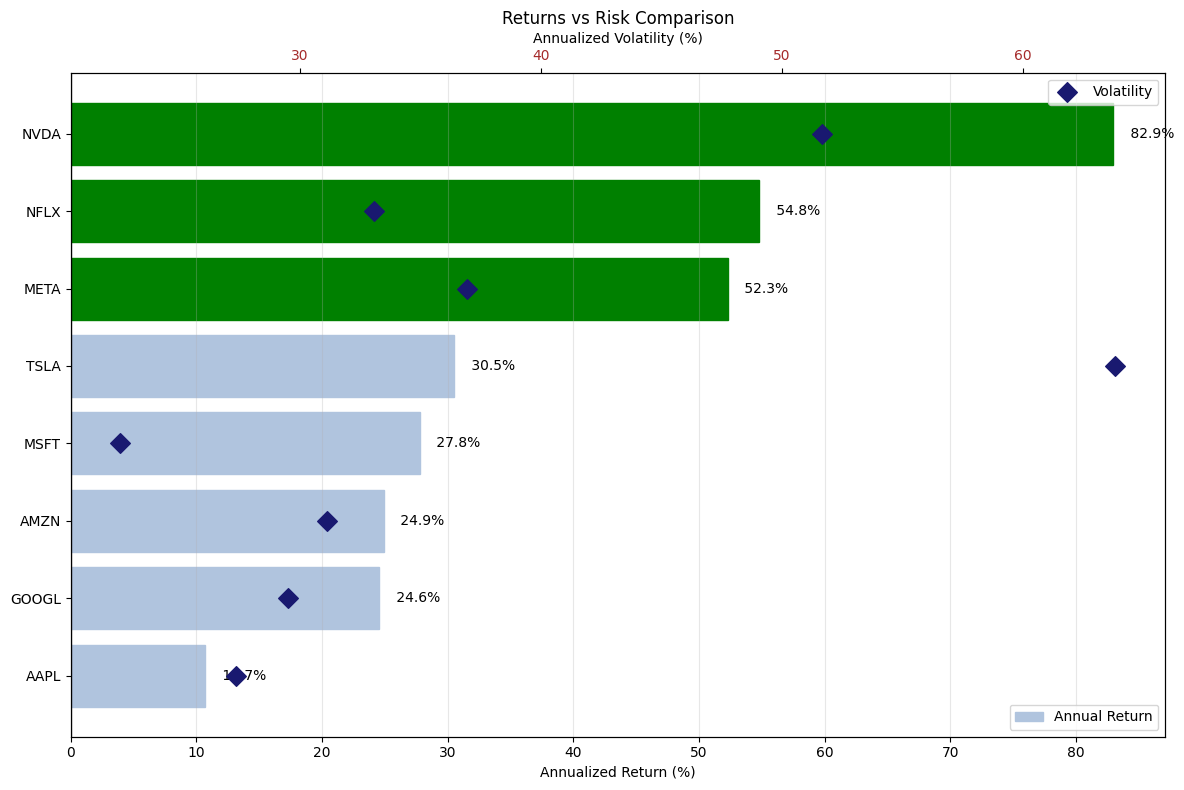

In [134]:
# Visualize risk-return relationships
#  Return Bar Chart with Risk Overlay
fig, ax2 = plt.subplots(figsize=(12,8))
sorted_stocks = return_stats_pct['Annualized Return'].sort_values(ascending=True).index

bars = ax2.barh(range(len(sorted_stocks)),
                return_stats_pct.loc[sorted_stocks, 'Annualized Return'],
                color = 'skyblue',
                edgecolor='black',
                label='Annual Return')

# Color coding
for i, (bar, stock) in enumerate(zip(bars, sorted_stocks)):
    return_val = return_stats_pct.loc[stock, 'Annualized Return']
    if return_val < 0:
        bar.set_color('red')
    elif return_val > 50:
        bar.set_color('green')
    elif return_val > 10:
        bar.set_color('lightsteelblue')
    else:
        bar.set_color('yellow')

    # Add return value as text labels
    ax2.text(return_val + (1 if return_val >= 0 else -1), i, f"{return_val: .1f}%" ,
             va='center', ha='left' if return_val >= 0 else 'right')

# Add volatility on secondary axis as dots
ax3 = ax2.twiny()
ax3.scatter(return_stats_pct.loc[sorted_stocks, 'Annualized Volatility'],
            range(len(sorted_stocks)),
            color= 'midnightblue',
            s =100,
            marker = 'D',
            label = 'Volatility', 
            zorder= 5)

ax2.set_yticks(range(len(sorted_stocks)))
ax2.set_yticklabels(sorted_stocks)
ax2.set_xlabel('Annualized Return (%)')
ax3.set_xlabel('Annualized Volatility (%)')
ax3.tick_params(axis='x', labelcolor='brown')

plt.title('Returns vs Risk Comparison')
ax2.grid(True, alpha=0.3, axis='x')
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.5, linewidth=1)

# Create combined legend
ax2.legend(loc='lower right')
ax3.legend(loc='upper right')

plt.tight_layout()
plt.show()



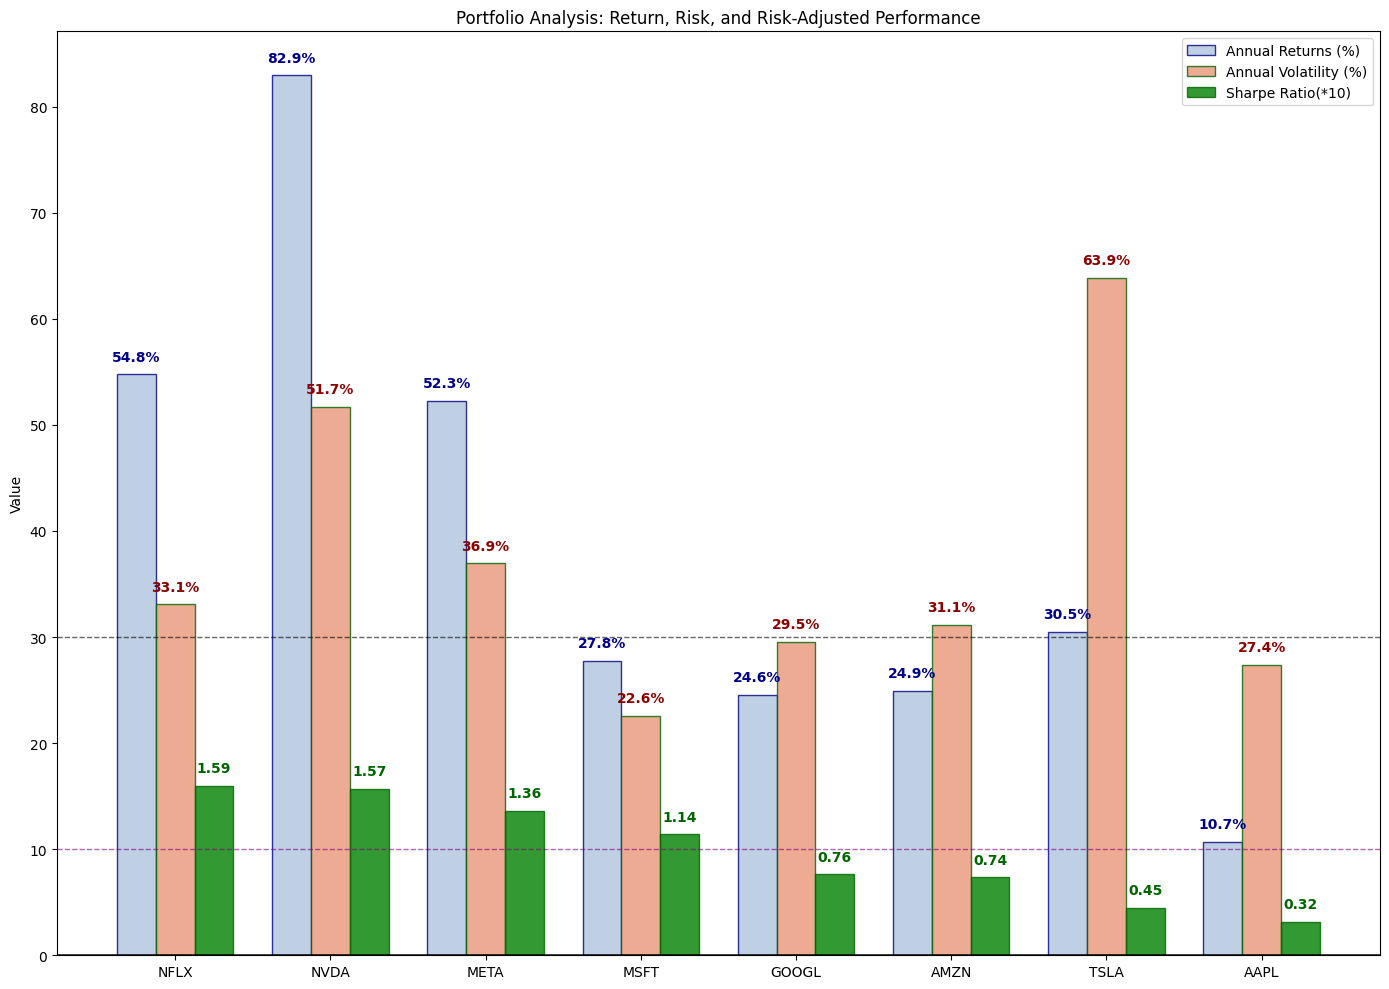

In [133]:
# Visulaize return, risk and risk-adjusted performances
sorted_stats = return_stats_pct.sort_values('Sharpe Ratio', ascending=False)
sorted_stocks = sorted_stats.index

# Create the graph
plt.figure(figsize=(14,10))
ax = plt.gca()

x_positions = np.arange(len(sorted_stocks))
bar_width = 0.25

# Bar chart for annualized return
bars_return = ax.bar(x_positions - bar_width,
                     sorted_stats['Annualized Return'],
                     bar_width,
                     label= 'Annual Returns (%)',
                     color='lightsteelblue',
                     alpha=0.8,
                     edgecolor='navy',
                     linewidth=1)


# Bar chart for annualized volatility
bars_volatility = ax.bar(x_positions,
                         sorted_stats['Annualized Volatility'],
                         bar_width,
                         label= 'Annual Volatility (%)',
                         color='darksalmon',
                         alpha=0.8,
                         edgecolor='darkgreen',
                         linewidth=1)

# Bar chart for Sharpe Ratio
scaled_sharpe = sorted_stats['Sharpe Ratio'] * 10
bars_sharpe = ax.bar(x_positions + bar_width,
                     scaled_sharpe,
                     bar_width,
                     label='Sharpe Ratio(*10)',
                     color='green',
                     alpha=0.8,
                     edgecolor='darkgreen',
                     linewidth=1)


# Add value labels
for i, stock in enumerate(sorted_stocks):
    return_val = sorted_stats.loc[stock, 'Annualized Return']
    volatility_val = sorted_stats.loc[stock, 'Annualized Volatility']
    sharpe_val = sorted_stats.loc[stock, 'Sharpe Ratio']

    if return_val >= 0:
        ax.text(i - bar_width, return_val + 1, f'{return_val:.1f}%', 
                ha='center', va='bottom', fontweight='bold',  color='darkblue')
    else:
        ax.text(i - bar_width, return_val - 1, f'{return_val:.1f}%', 
                ha='center', va='top', fontweight='bold',  color='darkblue')

    ax.text(i, volatility_val + 1, f'{volatility_val:.1f}%', 
            ha='center', va='bottom', fontweight='bold', color='darkred')
    
    ax.text(i + bar_width, (sharpe_val * 10) + 1, f'{sharpe_val:.2f}', 
            ha='center', va='bottom', fontweight='bold', color='darkgreen')
    

ax.set_xticks(x_positions)
ax.set_xticklabels(sorted_stocks)
ax.set_ylabel('Value')
ax.set_title('Portfolio Analysis: Return, Risk, and Risk-Adjusted Performance')

# Add reference lines for context
ax.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=2)  # Zero line
ax.axhline(y=10, color='purple', linestyle='--', alpha=0.6, linewidth=1)  # 10% return benchmark
ax.axhline(y=30, color='black', linestyle='--', alpha=0.6, linewidth=1)  # 30% volatility threshold

ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

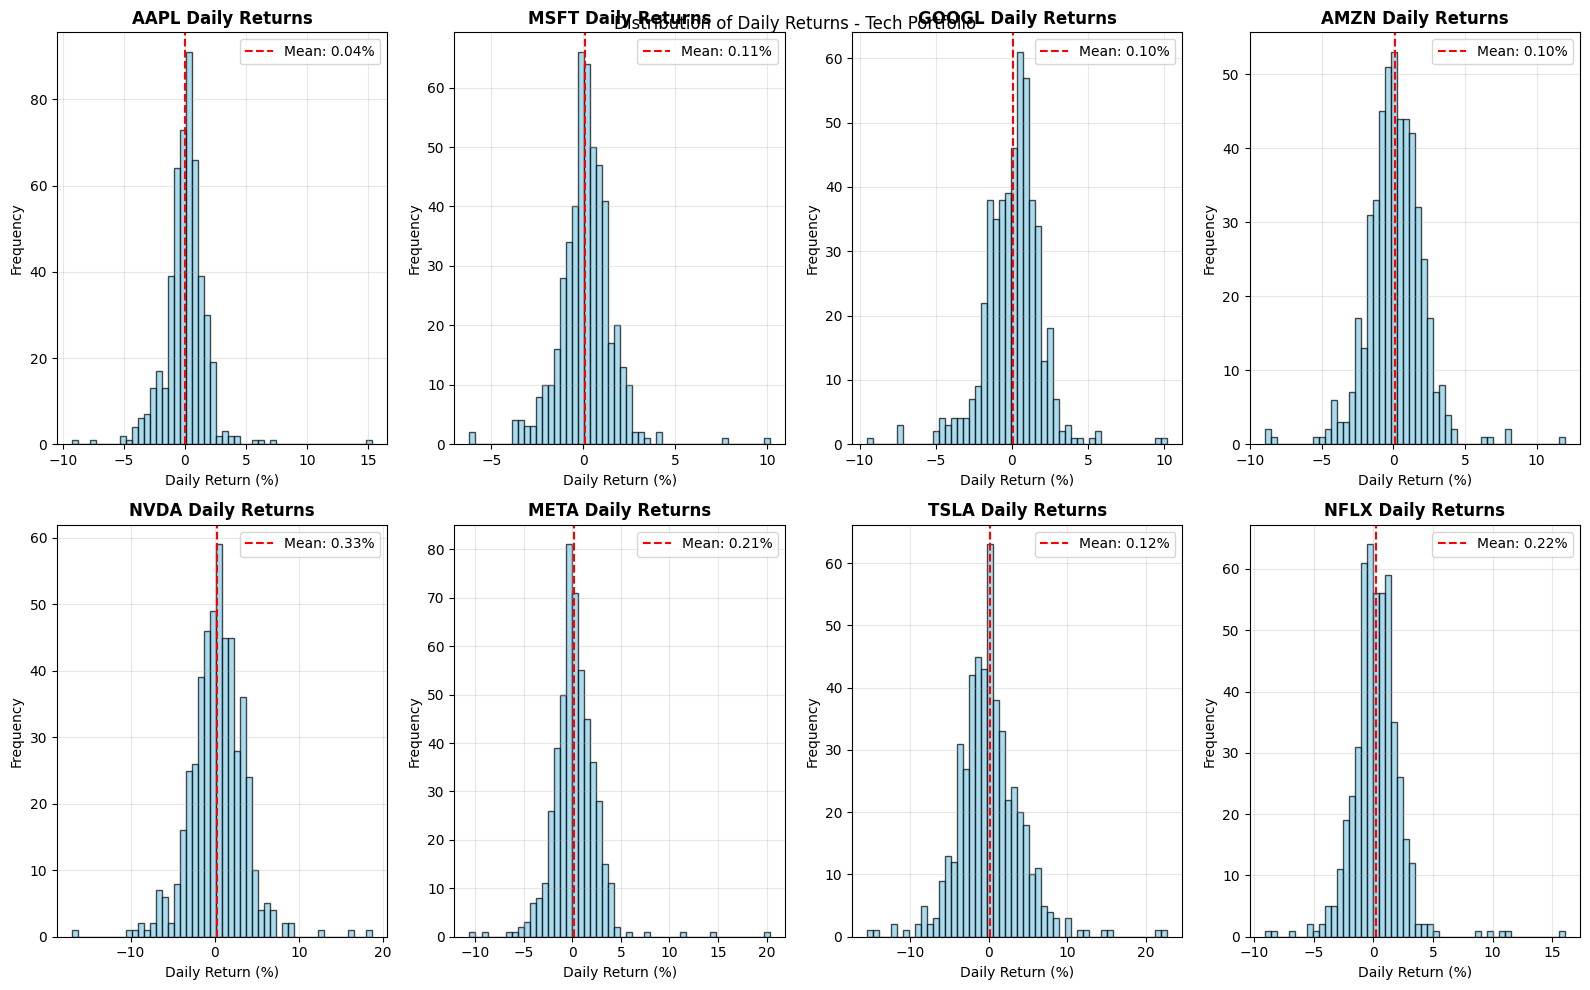

In [111]:
# Distribution of Daily Returns
fig, axes = plt.subplots(2, 4, figsize=(16,10))
axes = axes.flatten()

for i, stock in enumerate(daily_returns.columns):
    axes[i].hist(daily_returns[stock] * 100, bins= 50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{stock} Daily Returns', fontweight='bold')
    axes[i].set_xlabel('Daily Return (%)')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

    mean_return = daily_returns[stock].mean() * 100
    axes[i].axvline(mean_return, color='red', linestyle='--', 
                   label=f'Mean: {mean_return:.2f}%')
    axes[i].legend()

plt.tight_layout()
plt.suptitle('Distribution of Daily Returns - Tech Portfolio')
plt.show()

In [ ]:
# Portfolio Optimization
from scipy.optimize import minimize

expected_returns = daily_returns.mean()*252
cov_matrix = daily_returns.cov()*252
num_assets = len(expected_returns)

# Portfolio functions
def portfolio_return(weights, expected_returns):
    return np.sum(weights*expected_returns)

def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def portfolio_sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate):
    port_return = portfolio_return(weights, expected_returns)
    port_volatility = portfolio_volatility(weights, cov_matrix)
    return (port_return - risk_free_rate)/port_volatility

def negative_sharpe(weights, expected_returns, cov_matrix, risk_free_rate):
    return - portfolio_sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate)

#Constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) -1})
bounds = tuple((0, 0.5) for _ in range(num_assets))

initial_weights = np.array([1/num_assets]* num_assets)

# Optimize the weights to maximize sharpe ratio
optimized_results = minimize(negative_sharpe, initial_weights, 
                          args= (expected_returns, cov_matrix, risk_free_rate),
                          method='SLSQP', bounds= bounds, constraints=constraints)

# Get the optimal weights
optimal_weights = optimized_results.x

In [147]:
# Analyze the Optimal Portfolio
# Analytics of Optimal Portfolio
tickers = list(return_stats_pct.index)
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

print("="*50)

optimal_portfolio_return = portfolio_return(optimal_weights, expected_returns)
optimal_portfolio_volatility = portfolio_volatility(optimal_weights, cov_matrix)
optimal_sharpe_ratio = portfolio_sharpe_ratio(optimal_weights, expected_returns, cov_matrix, risk_free_rate)

print(f"Expected Portfolio Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

AAPL: 0.0000
MSFT: 0.0000
GOOGL: 0.0000
AMZN: 0.0000
NVDA: 0.2626
META: 0.2414
TSLA: 0.0000
NFLX: 0.4961
Expected Portfolio Return: 0.6157
Expected Volatility: 0.3088
Sharpe Ratio: 1.9291


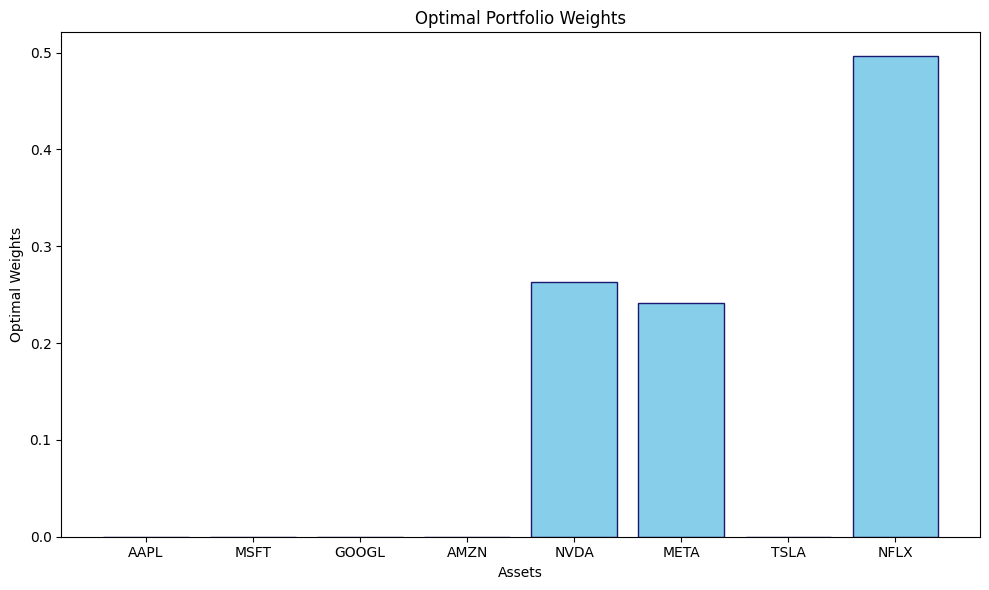

In [149]:
# Visualize the final portfolio

plt.figure(figsize=(10,6))
tickers = list(return_stats_pct.index)
plt.bar(tickers, optimal_weights, color='skyblue', edgecolor='midnightblue')

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')
plt.tight_layout()
plt.show()
